In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
import seaborn as sns

In [19]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

### Variable definitions in the Dataset

- **age**: age of the patient (in years)
- **sex**: sex of the patient
    - 0: female
    - 1: male
- **cp**: Chest pain type
    - 1: typical angina
    - 2: atypical angina
    - 3: non-anginal pain
    - 4: asymptomatic
- **trtbps**: resting blood pressure (in mm Hg)
- **chol**: serum cholestoral in mg/dl
- **fbs**: fasting blood sugar > 120 mg/dl
    - 0: False
    - 1: True
- **restecg**: resting electrocardiographic results
    - 0: hypertrophy
    - 1: normal
    - 2: having ST-T wave abnormality
- **thalachh**: maximum heart rate achieved
- **exng**: exercise induced angina
    - 0: no
    - 1: yes
- **oldpeak**: ST depression induced by exercise relative to rest
- **slp**: the slope of the peak exercise ST segment
    - 0: downsloping
    - 1: flat
    - 2: upsloping
- **caa**: number of major vessels (0-3)
- **thall**
    - 1: fixed defect
    - 2: normal
    - 3: reversable defect
- **output**: the predicted attribute
    - 0: less chance of heart attack
    - 1: more chance of heart attack

In [4]:
heart_df = pd.read_csv('/Users/daniel/Document/github/heart_attack_analysis/heart.csv')
heart_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
print('Shape of dataset:',heart_df.shape)

Shape of dataset: (303, 14)


In [7]:
heart_df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [8]:
unique = []

for i in heart_df.columns:
    unique.append(heart_df[i].nunique())

pd.DataFrame(unique,index=heart_df.columns,columns=['Unique Variables'])

,Unique Variables
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


In [10]:
null = []
for i in heart_df.columns:
    null.append(heart_df[i].isnull().sum())

pd.DataFrame(null,index=heart_df.columns,columns=['Missing Values'])

,Missing Values
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
restecg,0
thalachh,0
exng,0
oldpeak,0


In [11]:
cat_cols = ['sex','cp','fbs','restecg','exng','slp','caa','thall']
num_cols = ['age','trtbps','chol','thalachh','oldpeak']
target = ['output']

print('Categorical columns:',cat_cols)
print('Numerical columns:  ',num_cols)
print('Target:             ',target)

Categorical columns: ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']
Numerical columns:   ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
Target:              ['output']


In [16]:
heart_df[num_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [17]:
num_cols_df = heart_df[num_cols].corr().transpose()
num_cols_df

,age,trtbps,chol,thalachh,oldpeak
age,1.000000,0.279351,0.213678,-0.398522,0.210013
trtbps,0.279351,1.000000,0.123174,-0.046698,0.193216
chol,0.213678,0.123174,1.000000,-0.009940,0.053952
thalachh,-0.398522,-0.046698,-0.009940,1.000000,-0.344187
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000


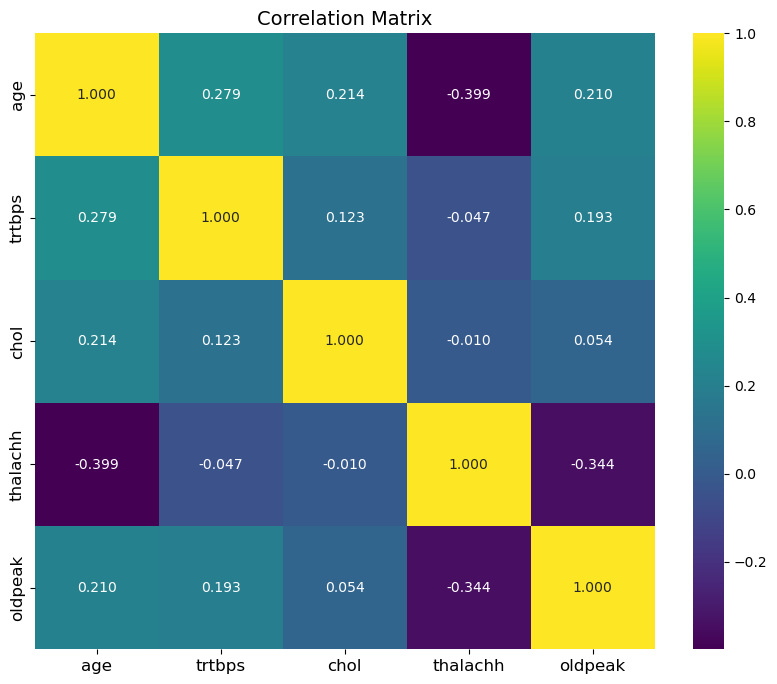

In [20]:
plt.figure(figsize=(10,8),dpi=100)
sns.heatmap(num_cols_df,annot=True,cmap='viridis',fmt='.3f')
plt.title('Correlation Matrix',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

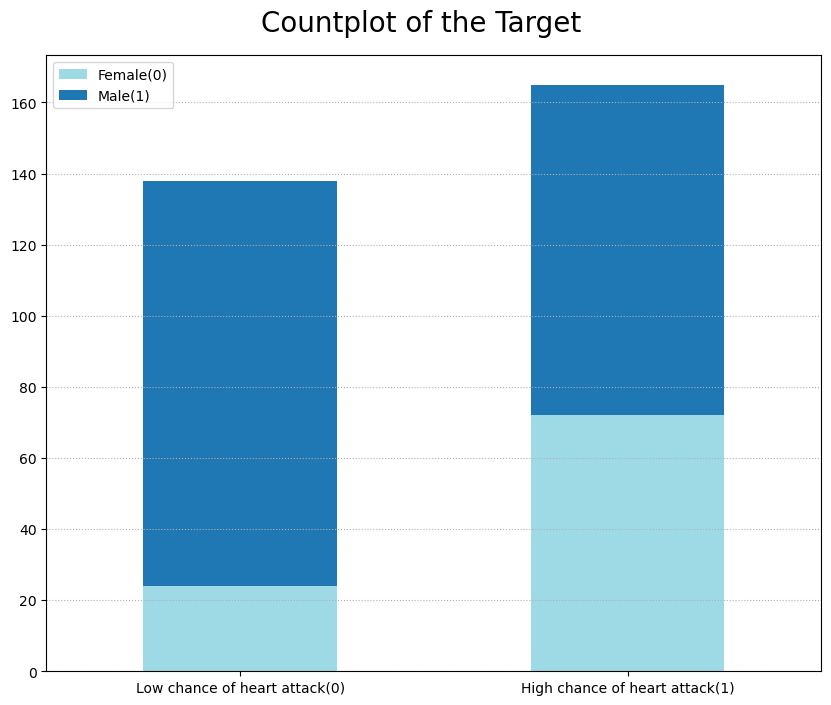

In [25]:
fig = plt.figure(figsize=(10,8),dpi=100)
gs = fig.add_gridspec(1,1)

ax = fig.add_subplot(gs[0,0])
# https://stackoverflow.com/questions/50319614/count-plot-with-stacked-bars-per-hue
plot_df = heart_df.groupby(['sex','output']).size().reset_index().pivot(columns='sex',index='output',values=0)
plot_df.plot(ax=ax,kind='bar',stacked=True,cmap='tab20_r')
ax.grid(ls=':',axis='y')
ax.set_xlabel('')
# ax.set_ylabel('')
ax.set_xticklabels(['Low chance of heart attack(0)','High chance of heart attack(1)'],fontsize=10,rotation=360)
plt.legend(labels=['Female(0)','Male(1)'])
fig.suptitle('Countplot of the Target',fontsize=20,va='center',y=0.92);

''

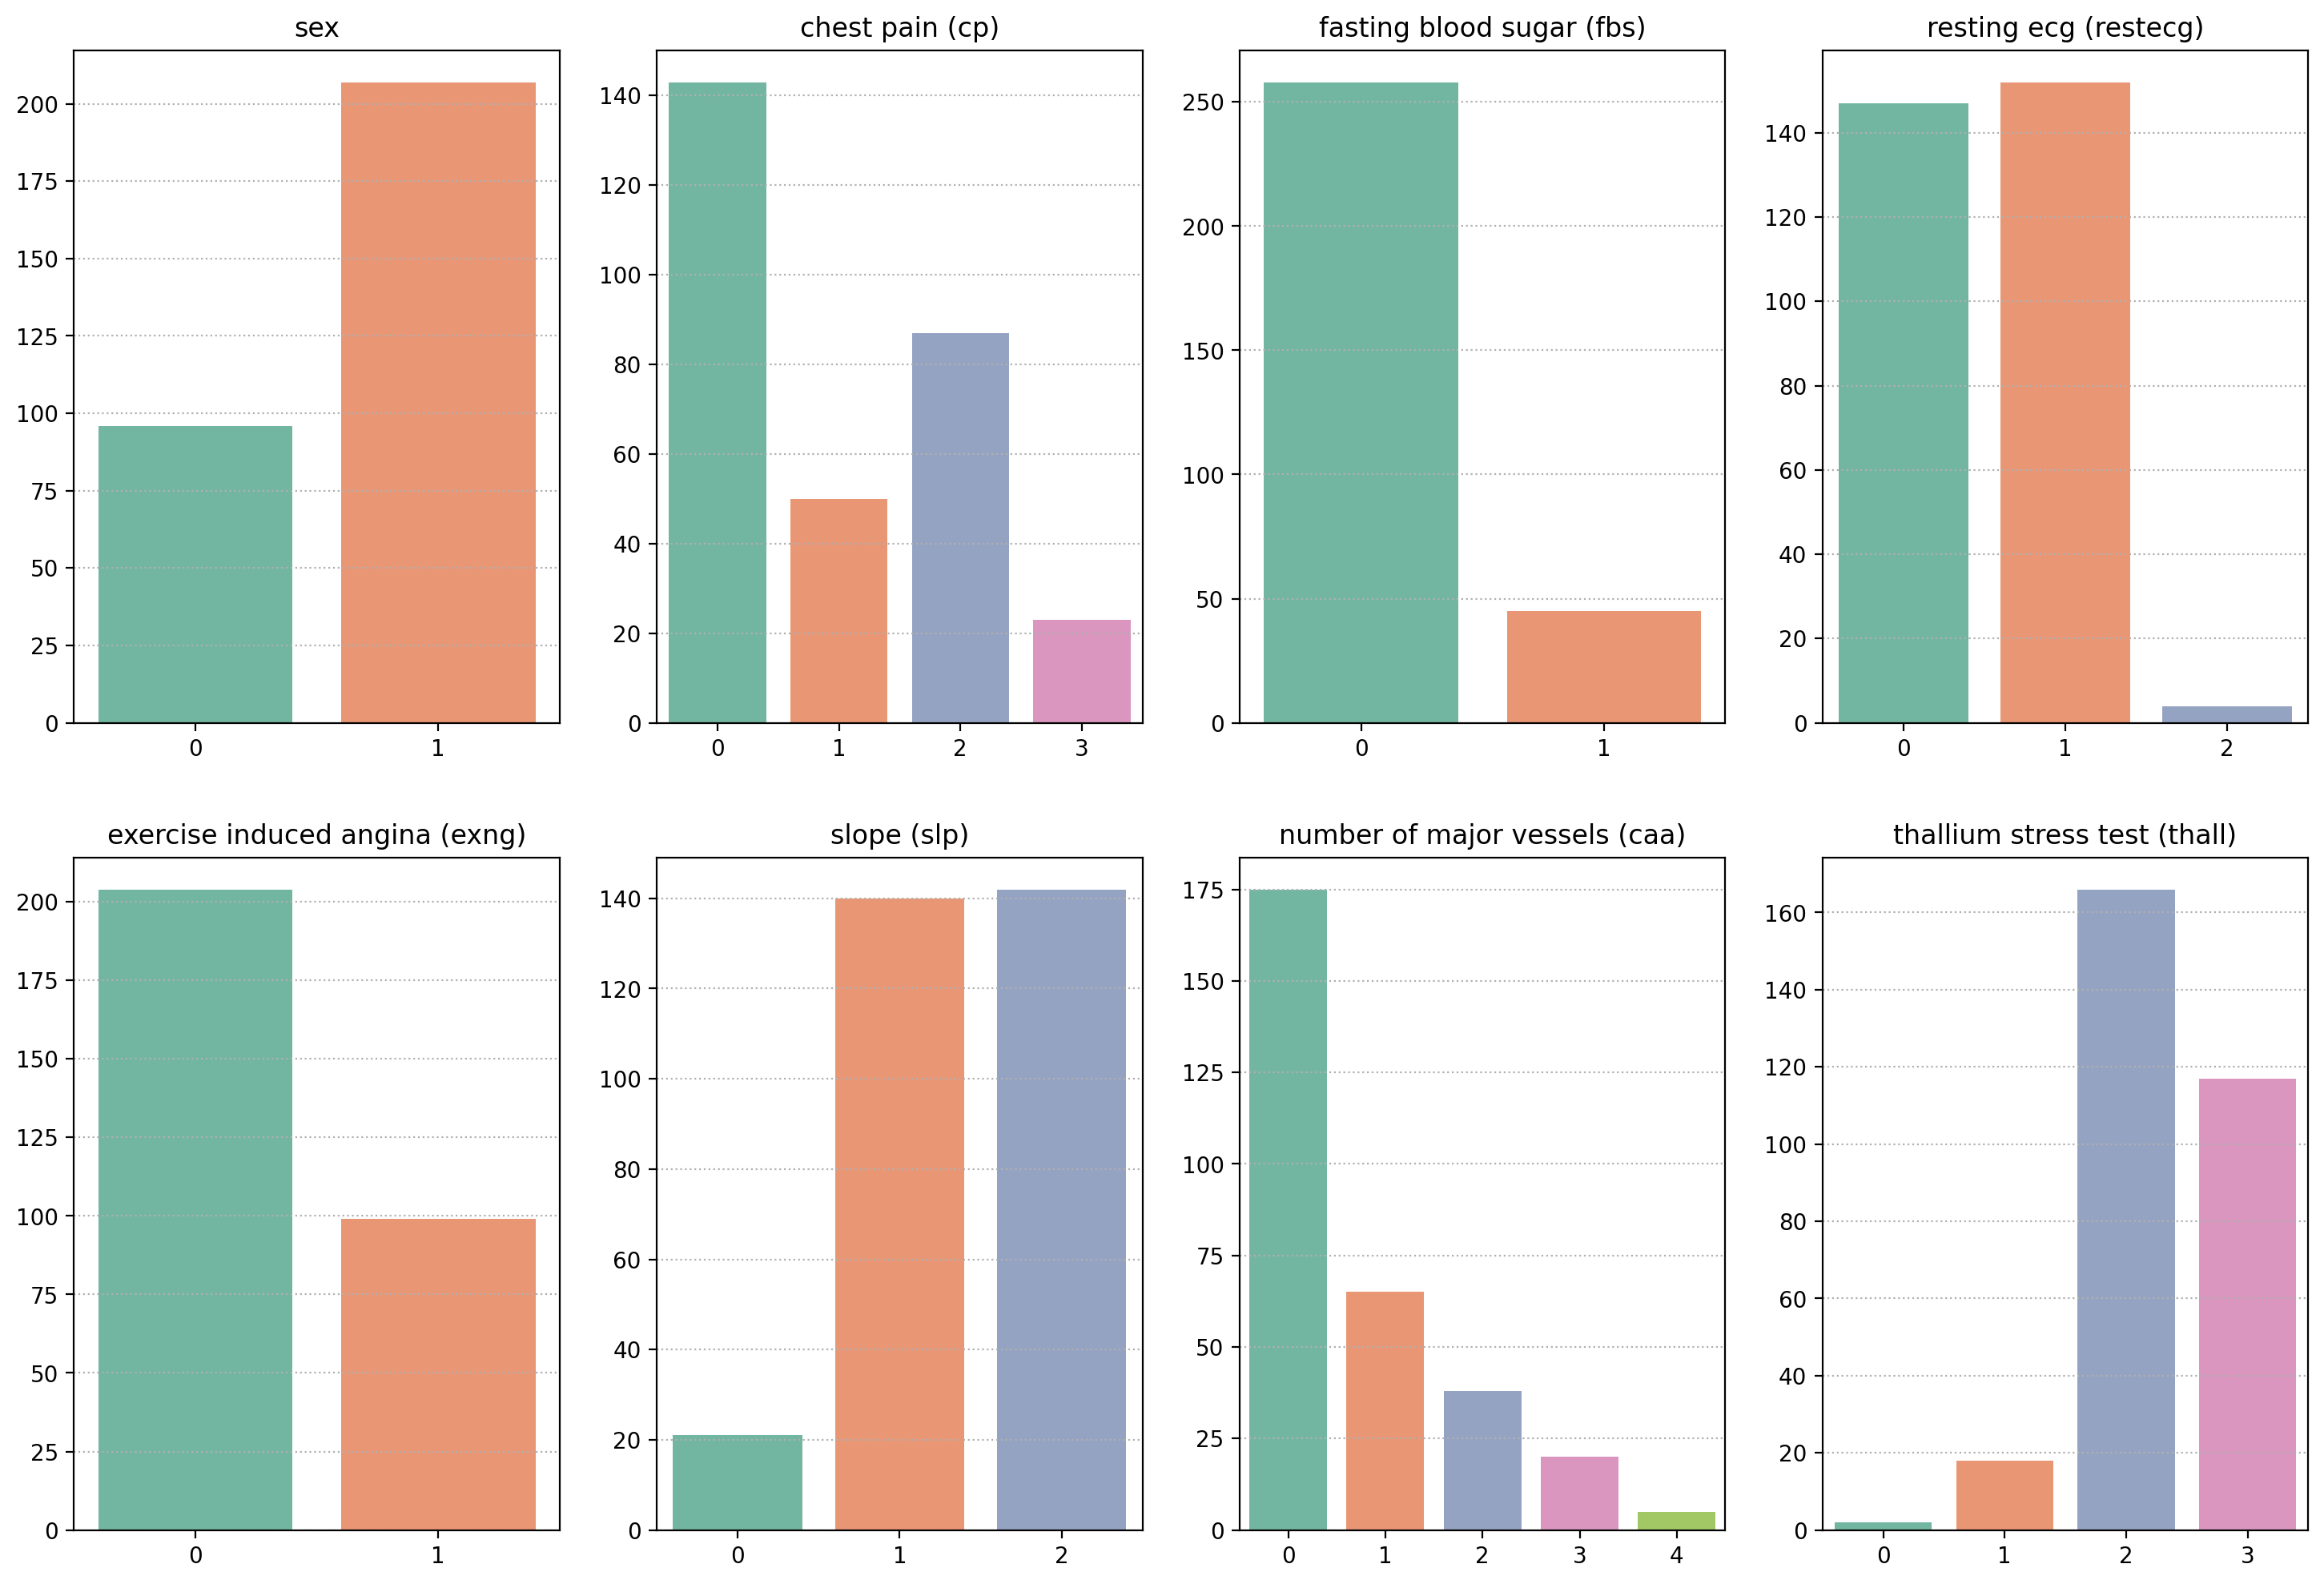

In [36]:
fig = plt.figure(figsize=(18,12),dpi=200)
gs = gridspec.GridSpec(2,4)
gs.update(wspace=0.2,hspace=0.2)

# sex output
ax0 = fig.add_subplot(gs[0,0])
sns.countplot(ax=ax0,data=heart_df,x='sex',palette='Set2')
ax0.grid(ls=':',axis='y')
ax0.set_title('sex',fontsize=12)
# ax0.set_xticklabels[('Female(0)','Male(1)')]
ax0.set_xlabel('')
ax0.set_ylabel('')

# cp output
ax1 = fig.add_subplot(gs[0,1])
sns.countplot(ax=ax1,data=heart_df,x='cp',palette='Set2')
ax1.grid(ls=':',axis='y')
ax1.set_title('chest pain (cp)',fontsize=12)
# ax1.set_xticklabels(['Typical Angina(0)','Atypical Angina(1)','Non-anginal Pain(2)','Asymptomatic(3)'])
ax1.set_xlabel('')
ax1.set_ylabel('')

# fbs output
ax2 = fig.add_subplot(gs[0,2])
sns.countplot(ax=ax2,data=heart_df,x='fbs',palette='Set2')
ax2.grid(ls=':',axis='y')
ax2.set_title('fasting blood sugar (fbs)',fontsize=12)
ax2.set_xlabel('')
ax2.set_ylabel('')

# restecg output
ax3 = fig.add_subplot(gs[0,3])
sns.countplot(ax=ax3,data=heart_df,x='restecg',palette='Set2')
ax3.grid(ls=':',axis='y')
ax3.set_title('resting ecg (restecg)',fontsize=12)
# ax3.set_xticklabels(['Normal(0)','ST-T wave normality(1)','Left ventricular hypertrophy(2)'])
ax3.set_xlabel('')
ax3.set_ylabel('')

# exng output
ax4 = fig.add_subplot(gs[1,0])
sns.countplot(ax=ax4,data=heart_df,x='exng',palette='Set2')
ax4.grid(ls=':',axis='y')
ax4.set_title('exercise induced angina (exng)',fontsize=12)
# ax4.set_xticklabels(['No(0)','Yes(1)'])
ax4.set_xlabel('')
ax4.set_ylabel('')

# slp output
ax5 = fig.add_subplot(gs[1,1])
sns.countplot(ax=ax5,data=heart_df,x='slp',palette='Set2')
ax5.grid(ls=':',axis='y')
ax5.set_title('slope (slp)',fontsize=12)
ax5.set_xlabel('')
ax5.set_ylabel('')

# caa output
ax6 = fig.add_subplot(gs[1,2])
sns.countplot(ax=ax6,data=heart_df,x='caa',palette='Set2')
ax6.grid(ls=':',axis='y')
ax6.set_title('number of major vessels (caa)',fontsize=12)
ax6.set_xlabel('')
ax6.set_ylabel('')

# thall output
ax7 = fig.add_subplot(gs[1,3])
sns.countplot(ax=ax7,data=heart_df,x='thall',palette='Set2')
ax7.grid(ls=':',axis='y')
ax7.set_title('thallium stress test (thall)',fontsize=12)
ax7.set_xlabel('')
ax7.set_ylabel('')
;

''

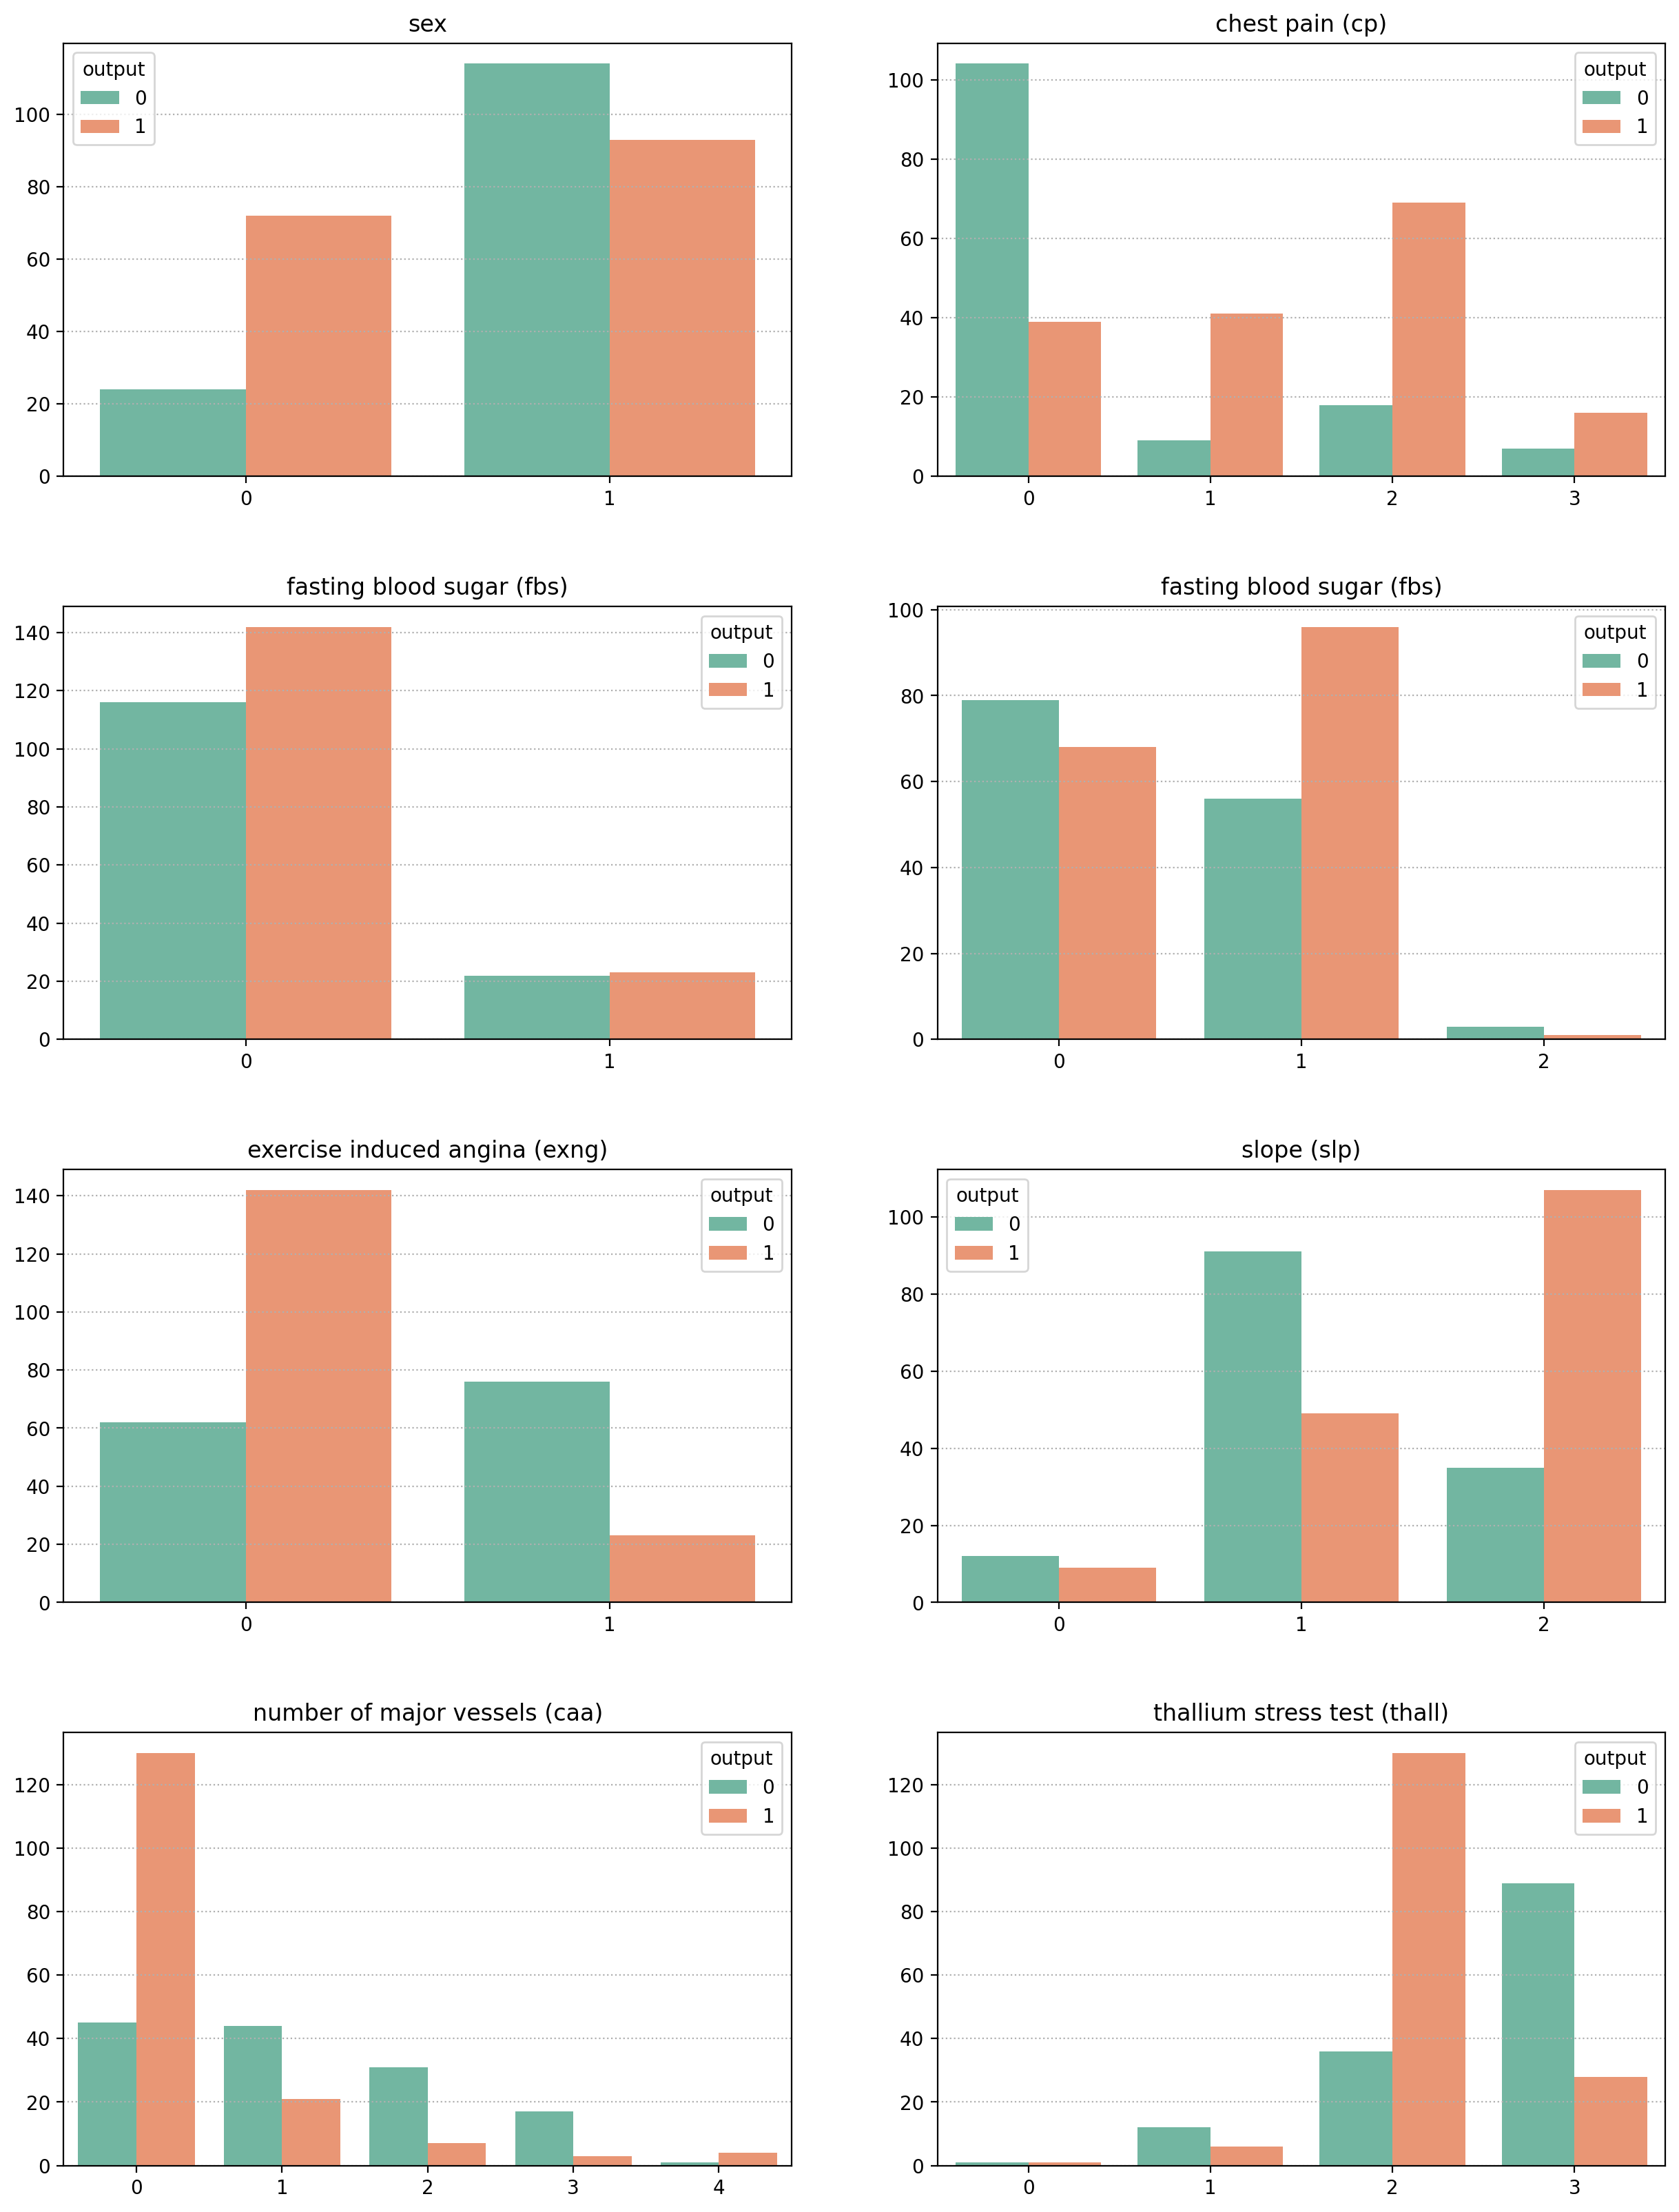

In [44]:
fig = plt.figure(figsize=(15,20),dpi=200)
gs = gridspec.GridSpec(4,2)
gs.update(wspace=0.2,hspace=0.3)

# sex count
ax0 = fig.add_subplot(gs[0,0])
sns.countplot(ax=ax0,data=heart_df,x='sex',hue='output',palette='Set2')
ax0.grid(ls=':',axis='y')
# ax0 = set.xticklabels(['Female(0)','Male(1)'])
ax0.set_title('sex',fontsize=12)
ax0.set_xlabel('')
ax0.set_ylabel('')

# cp count
ax1 = fig.add_subplot(gs[0,1])
sns.countplot(ax=ax1,data=heart_df,x='cp',hue='output',palette='Set2')
ax1.grid(ls=':',axis='y')
# ax1.set_xticklabels(['Typical Angina(0)','Atypical Angina(1)','Non-anginal Pain(2)','Asymptomatic(3)'])
ax1.set_title('chest pain (cp)',fontsize=12)
ax1.set_xlabel('')
ax1.set_ylabel('')

# fbs count
ax2 = fig.add_subplot(gs[1,0])
sns.countplot(ax=ax2,data=heart_df,x='fbs',hue='output',palette='Set2')
ax2.grid(ls=':',axis='y')
# ax2.set_xticklabels(['False(0)','True(1)'])
ax2.set_title('fasting blood sugar (fbs)',fontsize=12)
ax2.set_xlabel('')
ax2.set_ylabel('')

# restecg count
ax3 = fig.add_subplot(gs[1,1])
sns.countplot(ax=ax3,data=heart_df,x='restecg',hue='output',palette='Set2')
ax3.grid(ls=':',axis='y')
# ax3.set_xticklabels(['Normal(0)','ST-T wave normality(1)','Left ventricular hypertrophy(2)'])
ax3.set_title('fasting blood sugar (fbs)',fontsize=12)
ax3.set_xlabel('')
ax3.set_ylabel('')

# exng count
ax4 = fig.add_subplot(gs[2,0])
sns.countplot(ax=ax4,data=heart_df,x='exng',hue='output',palette='Set2')
ax4.grid(ls=':',axis='y')
# ax4.set_xticklabels(['No(0)','Yes(1)'])
ax4.set_title('exercise induced angina (exng)',fontsize=12)
ax4.set_xlabel('')
ax4.set_ylabel('')

# slp count
ax5 = fig.add_subplot(gs[2,1])
sns.countplot(ax=ax5,data=heart_df,x='slp',hue='output',palette='Set2')
ax5.grid(ls=':',axis='y')
ax5.set_title('slope (slp)',fontsize=12)
ax5.set_xlabel('')
ax5.set_ylabel('')

# caa count
ax6 = fig.add_subplot(gs[3,0])
sns.countplot(ax=ax6,data=heart_df,x='caa',hue='output',palette='Set2')
ax6.grid(ls=':',axis='y')
ax6.set_title('number of major vessels (caa)',fontsize=12)
ax6.set_xlabel('')
ax6.set_ylabel('')

# thall count
ax7 = fig.add_subplot(gs[3,1])
sns.countplot(ax=ax7,data=heart_df,x='thall',hue='output',palette='Set2')
ax7.grid(ls=':',axis='y')
ax7.set_title('thallium stress test (thall)',fontsize=12)
ax7.set_xlabel('')
ax7.set_ylabel('')
;

''

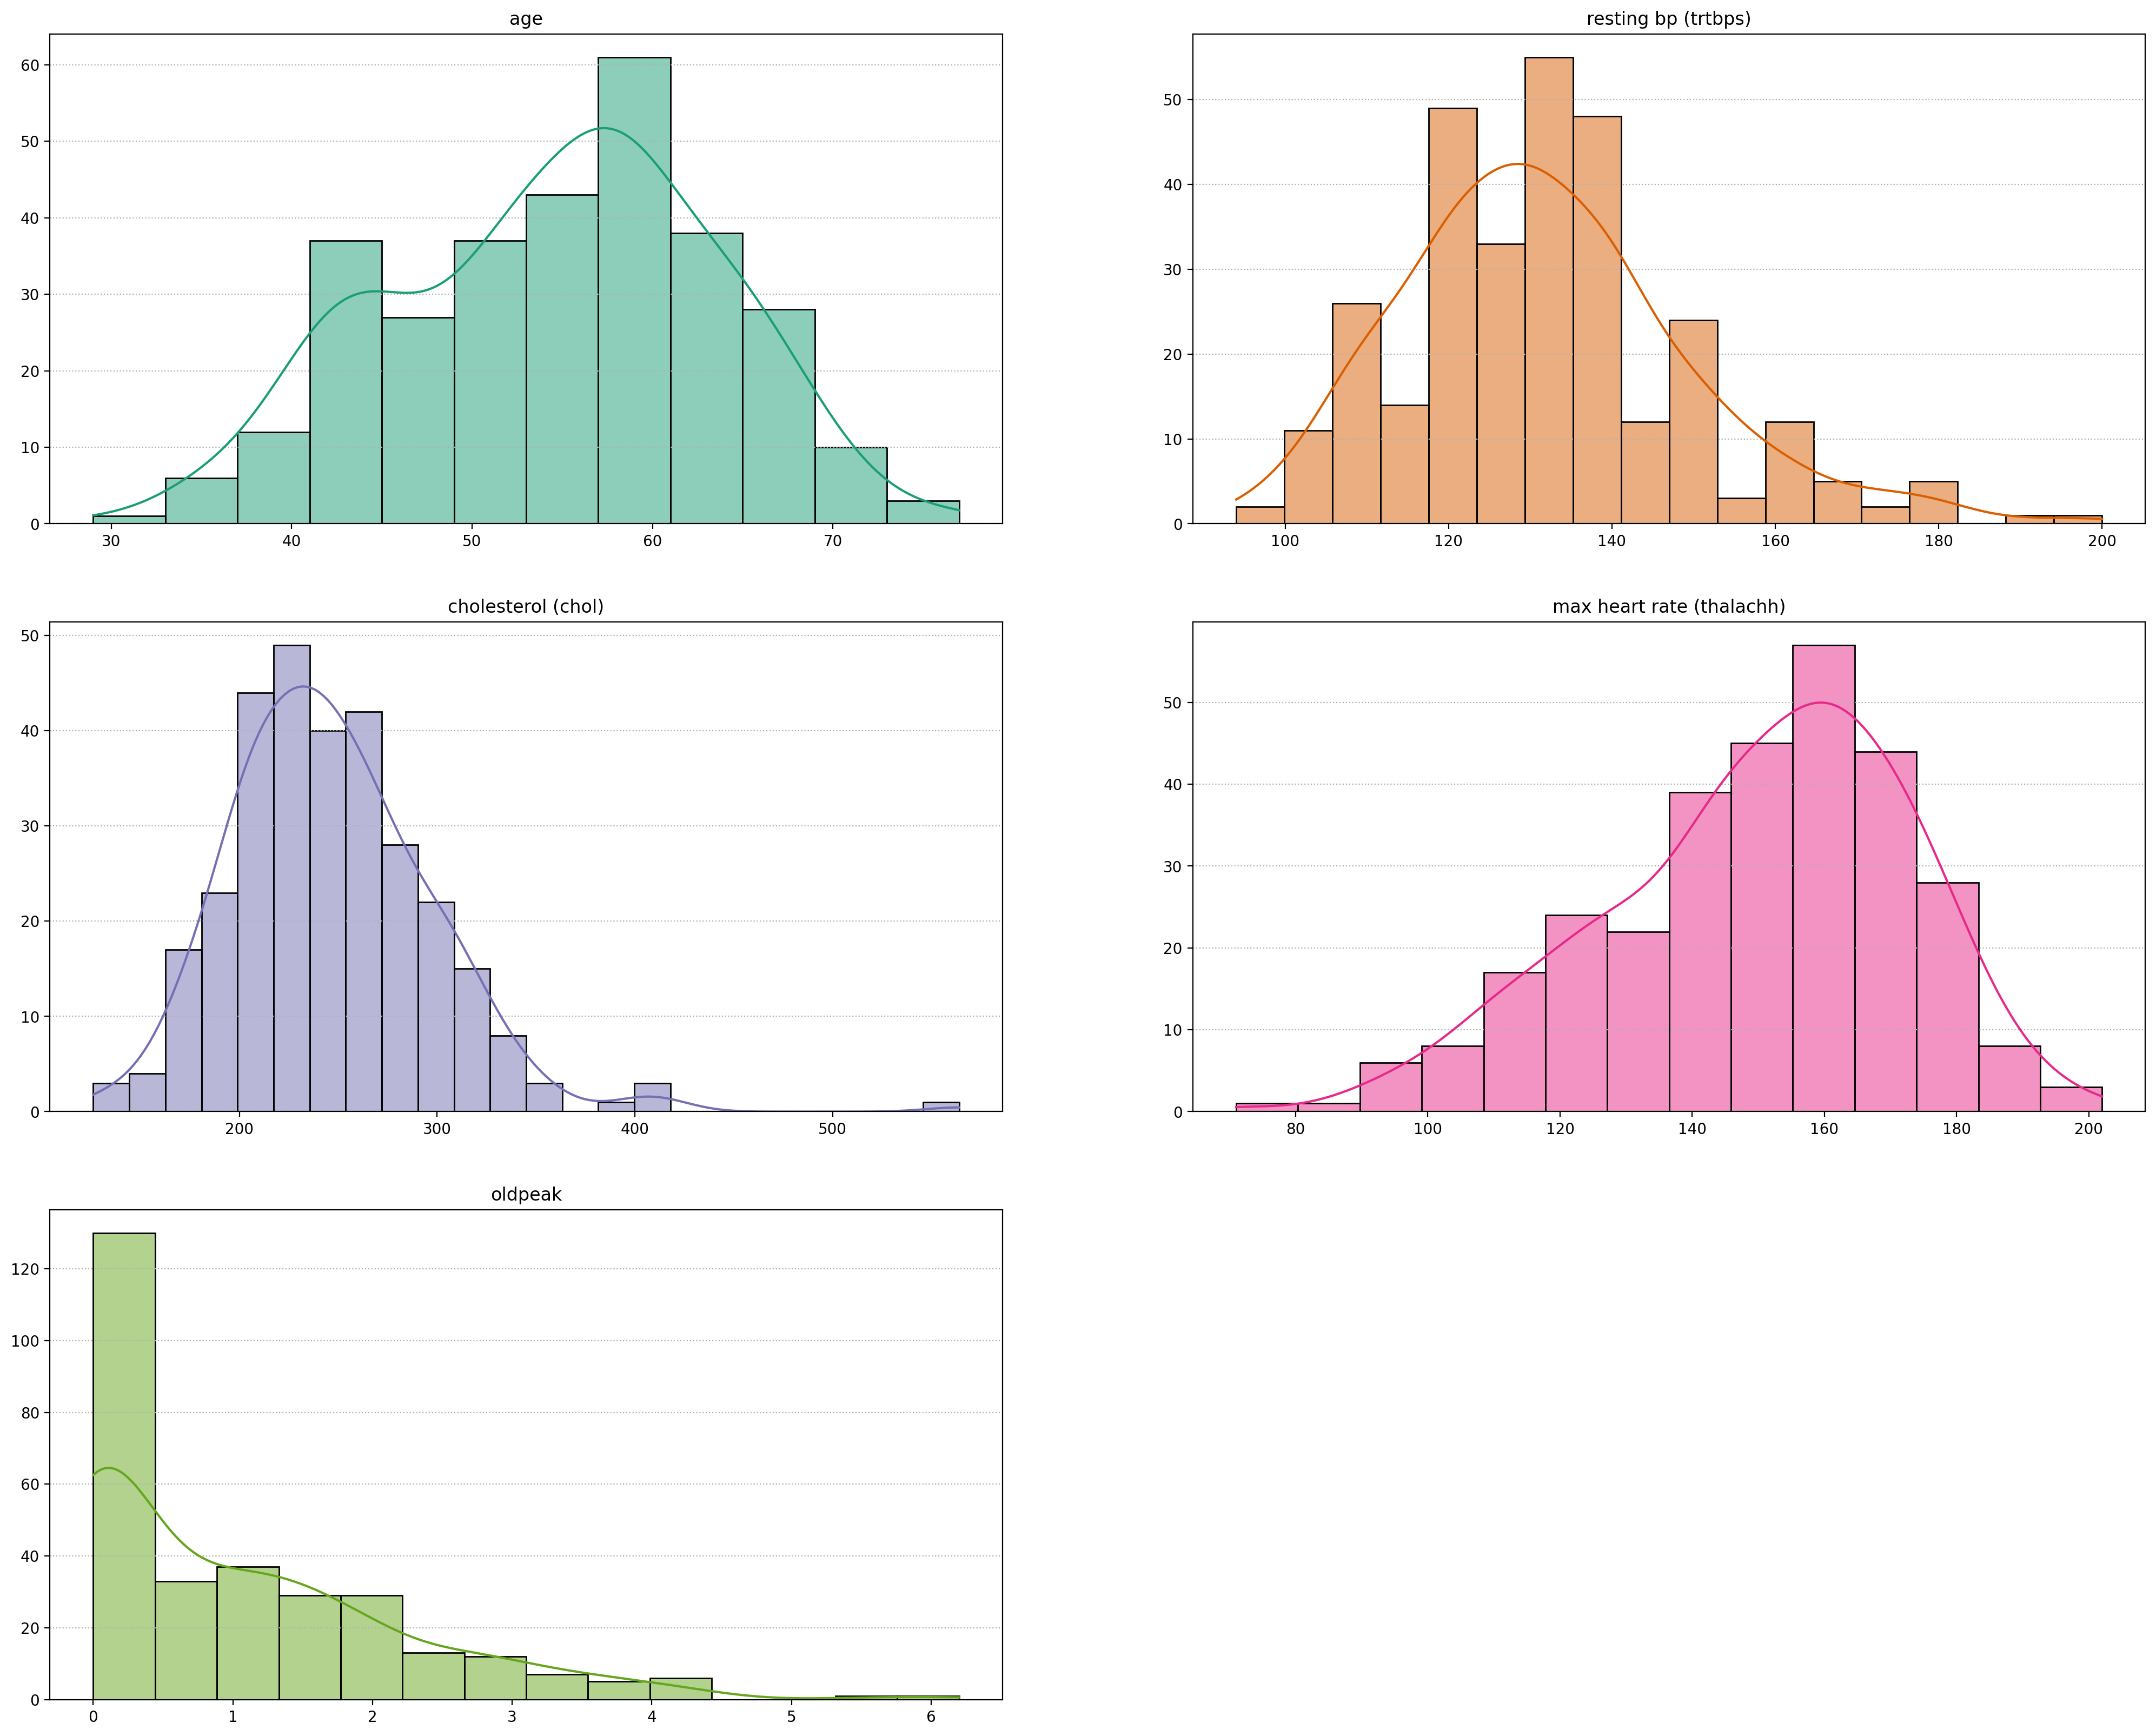

In [50]:
fig = plt.figure(figsize=(25,20),dpi=200)
gs = fig.add_gridspec(3,2)
gs.update(wspace=0.2,hspace=0.2)

# age
ax0 = fig.add_subplot(gs[0,0])
sns.histplot(ax=ax0,data=heart_df,x='age',kde=True,color=['#1b9e77'])
ax0.grid(ls=':',axis='y')
ax0.set_title('age',fontsize=12)
ax0.set_xlabel('')
ax0.set_ylabel('')

# trtbps
ax1 = fig.add_subplot(gs[0,1])
sns.histplot(ax=ax1,data=heart_df,x='trtbps',kde=True,color=['#d95f02'])
ax1.grid(ls=':',axis='y')
ax1.set_title('resting bp (trtbps)',fontsize=12)
ax1.set_xlabel('')
ax1.set_ylabel('')

# chol
ax2 = fig.add_subplot(gs[1,0])
sns.histplot(ax=ax2,data=heart_df,x='chol',kde=True,color=['#7570b3'])
ax2.grid(ls=':',axis='y')
ax2.set_title('cholesterol (chol)',fontsize=12)
ax2.set_xlabel('')
ax2.set_ylabel('')

# thalachh
ax3 = fig.add_subplot(gs[1,1])
sns.histplot(ax=ax3,data=heart_df,x='thalachh',kde=True,color=['#e7298a'])
ax3.grid(ls=':',axis='y')
ax3.set_title('max heart rate (thalachh)',fontsize=12)
ax3.set_xlabel('')
ax3.set_ylabel('')

# oldpeak
ax4 = fig.add_subplot(gs[2,0])
sns.histplot(ax=ax4,data=heart_df,x='oldpeak',kde=True,color=['#66a61e'])
ax4.grid(ls=':',axis='y')
ax4.set_title('oldpeak',fontsize=12)
ax4.set_xlabel('')
ax4.set_ylabel('')
;

''

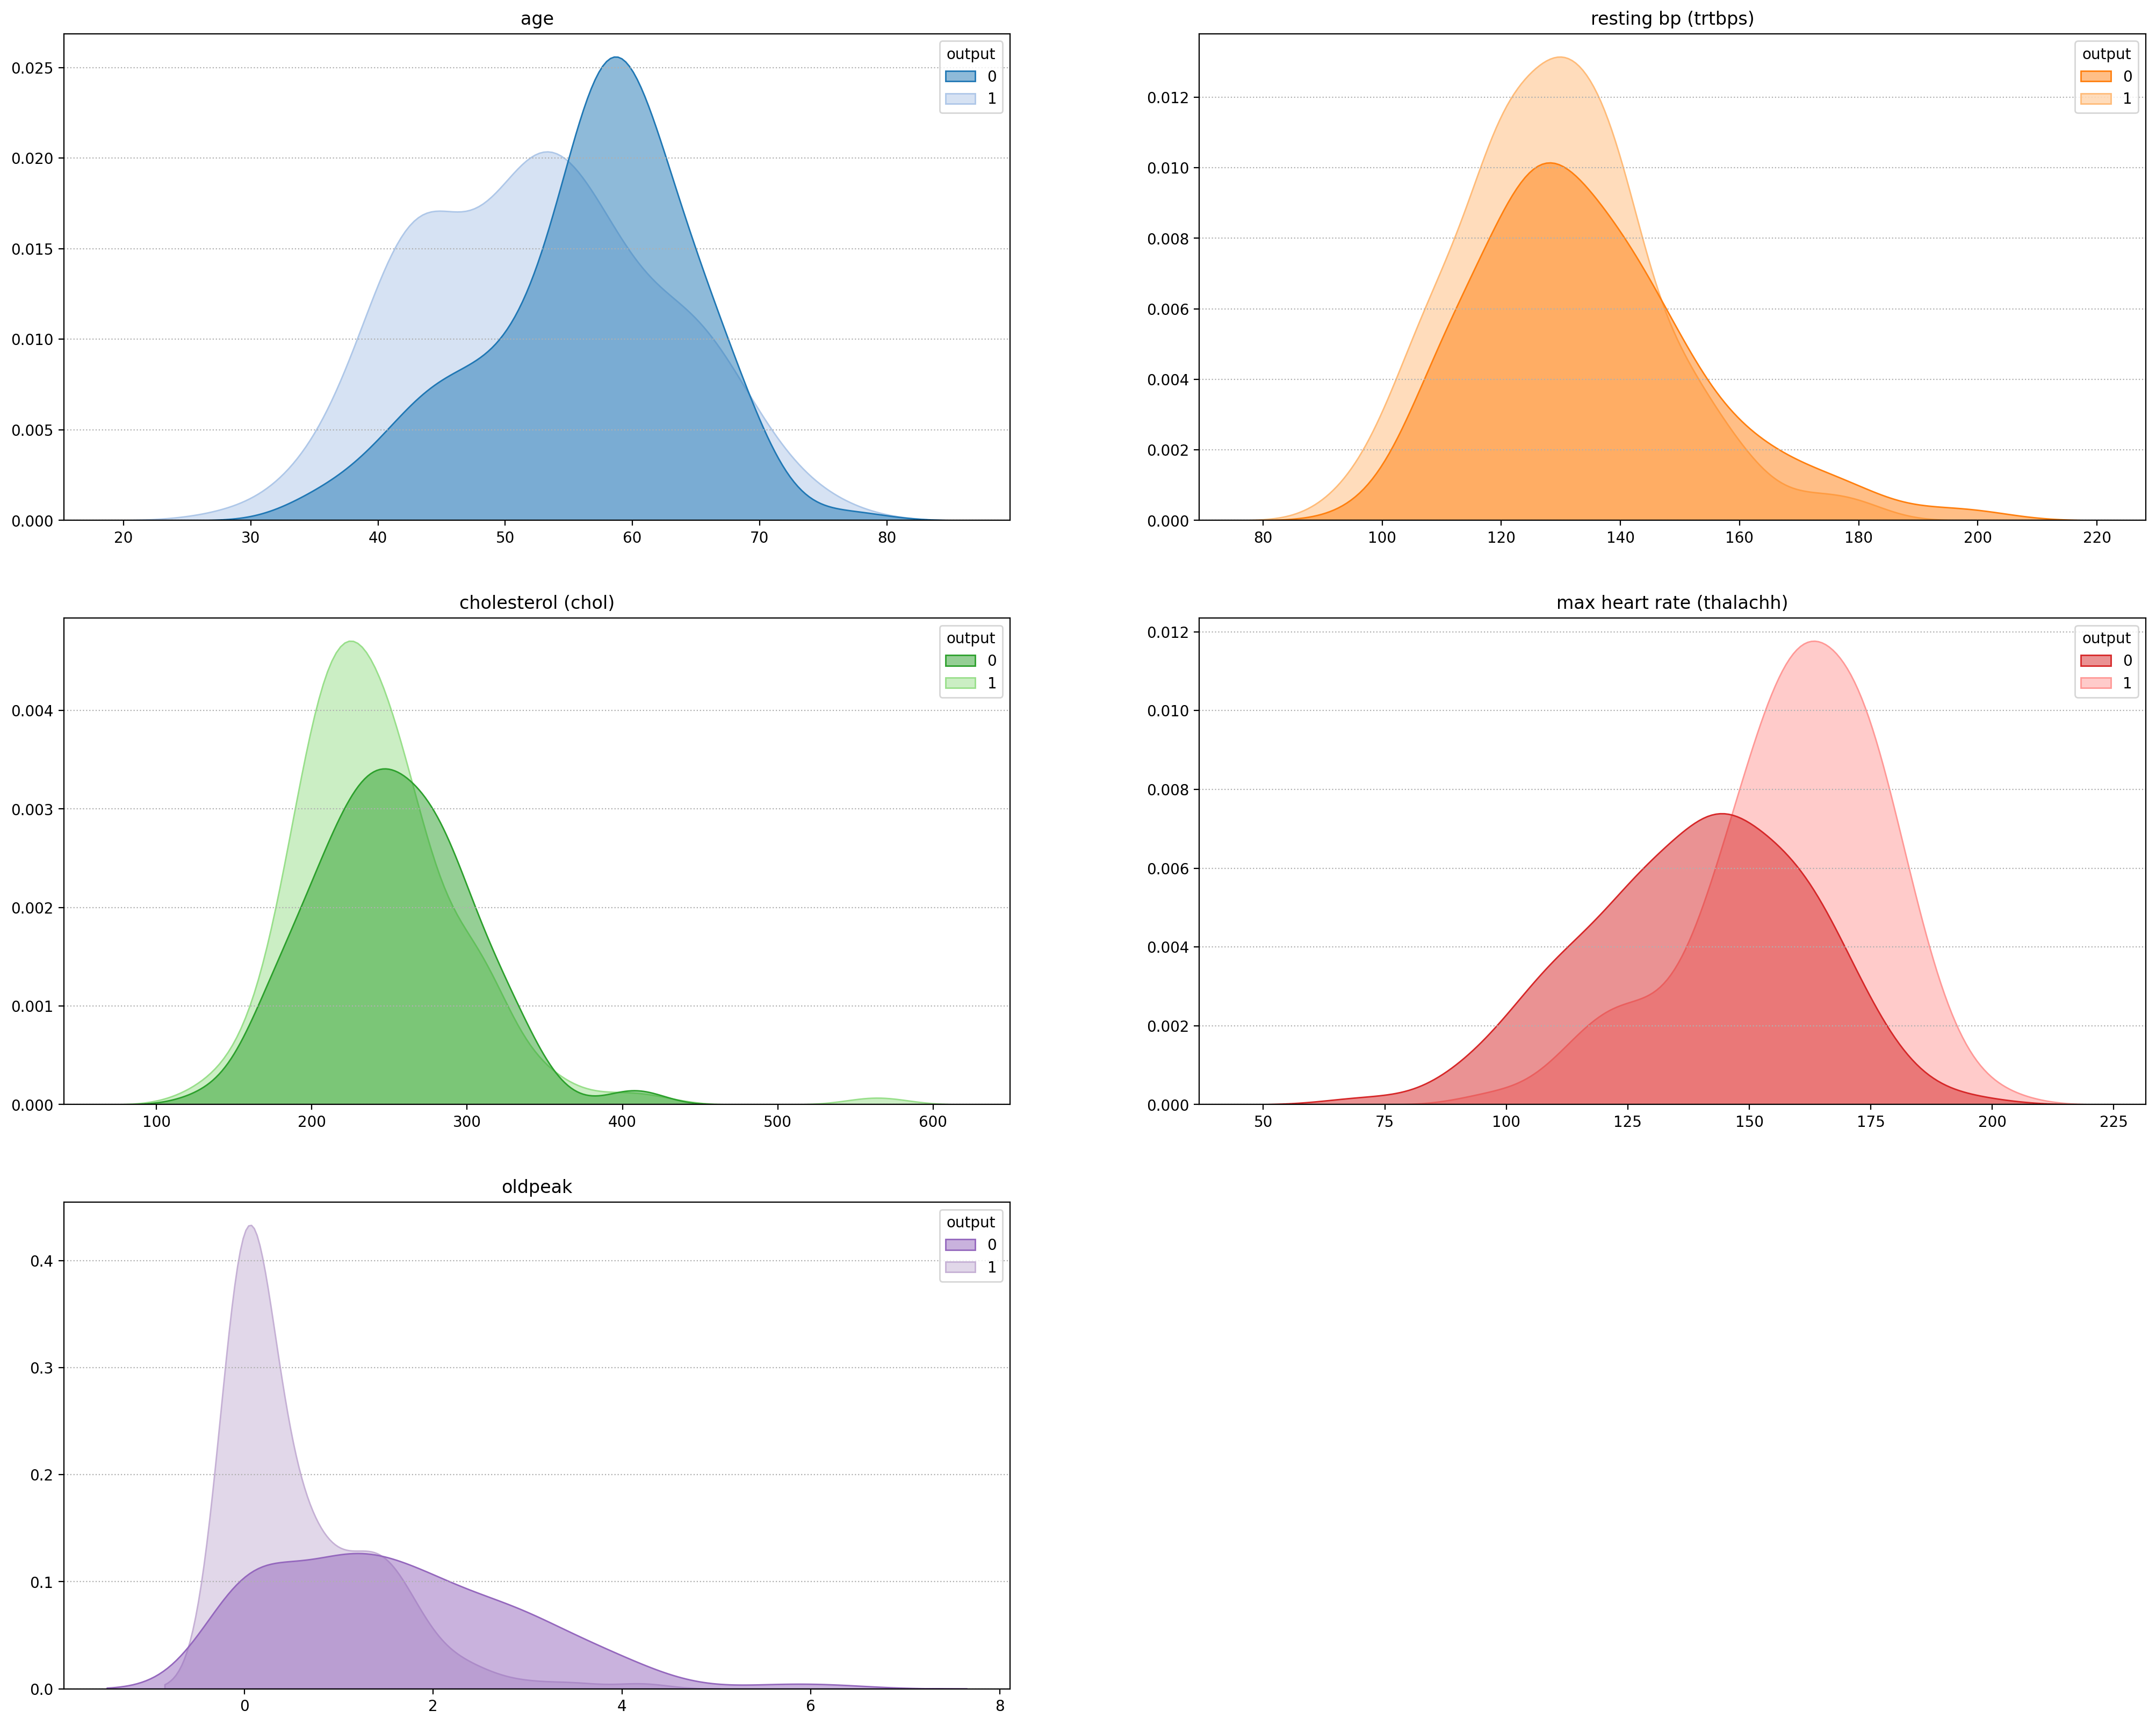

In [55]:
fig = plt.figure(figsize=(25,20),dpi=200)
gs = fig.add_gridspec(3,2)
gs.update(wspace=0.2,hspace=0.2)

# age
ax0 = fig.add_subplot(gs[0,0])
sns.kdeplot(ax=ax0,data=heart_df,x='age',hue='output',fill=True,palette=['#1f77b4','#aec7e8'],alpha=0.5,lw=1)
ax0.grid(ls=':',axis='y')
ax0.set_title('age',fontsize=12)
ax0.set_xlabel('')
ax0.set_ylabel('')

# trtbps
ax1 = fig.add_subplot(gs[0,1])
sns.kdeplot(ax=ax1,data=heart_df,x='trtbps',hue='output',fill=True,palette=['#ff7f0e','#ffbb78'],alpha=0.5,lw=1)
ax1.grid(ls=':',axis='y')
ax1.set_title('resting bp (trtbps)',fontsize=12)
ax1.set_xlabel('')
ax1.set_ylabel('')

# chol
ax2 = fig.add_subplot(gs[1,0])
sns.kdeplot(ax=ax2,data=heart_df,x='chol',hue='output',fill=True,palette=['#2ca02c','#98df8a'],alpha=0.5,lw=1)
ax2.grid(ls=':',axis='y')
ax2.set_title('cholesterol (chol)',fontsize=12)
ax2.set_xlabel('')
ax2.set_ylabel('')

# thalachh
ax3 = fig.add_subplot(gs[1,1])
sns.kdeplot(ax=ax3,data=heart_df,x='thalachh',hue='output',fill=True,palette=['#d62728','#ff9896'],alpha=0.5,lw=1)
ax3.grid(ls=':',axis='y')
ax3.set_title('max heart rate (thalachh)',fontsize=12)
ax3.set_xlabel('')
ax3.set_ylabel('')

# oldpeak
ax4 = fig.add_subplot(gs[2,0])
sns.kdeplot(ax=ax4,data=heart_df,x='oldpeak',hue='output',fill=True,palette=['#9467bd','#c5b0d5'],alpha=0.5,lw=1)
ax4.grid(ls=':',axis='y')
ax4.set_title('oldpeak',fontsize=12)
ax4.set_xlabel('')
ax4.set_ylabel('')
;

<Figure size 1280x960 with 0 Axes>

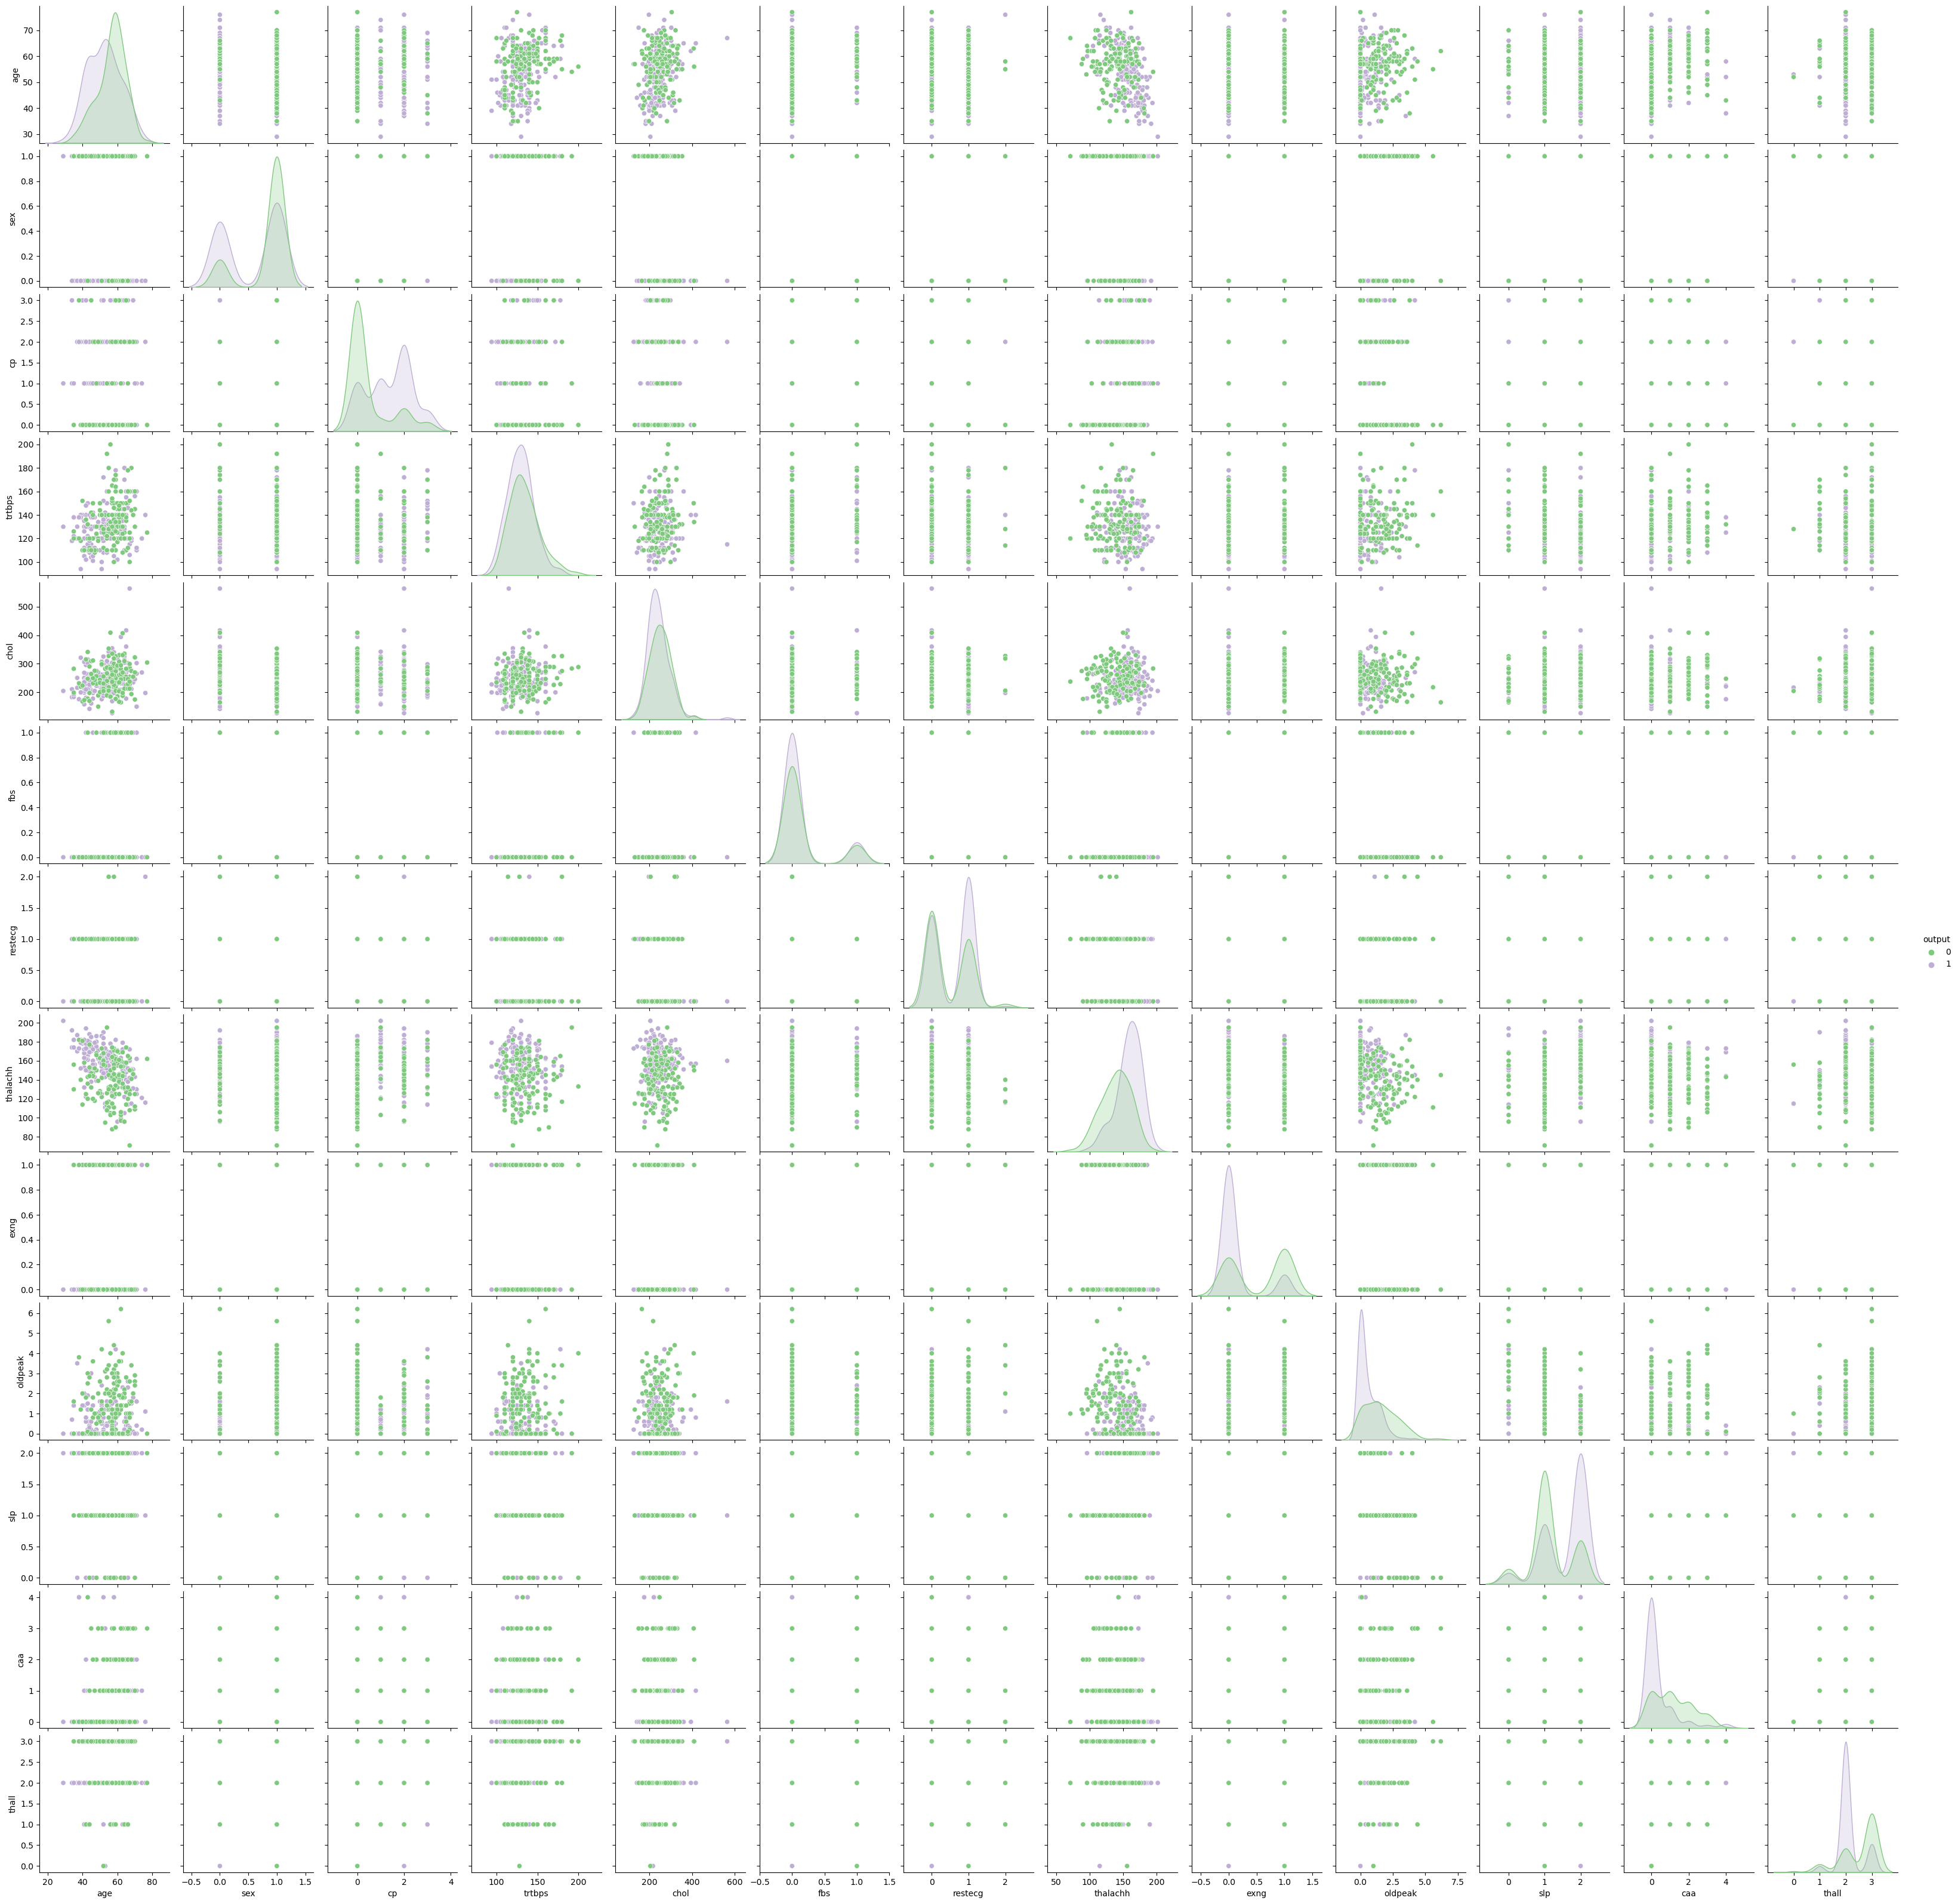

In [56]:
plt.figure(dpi=200)
sns.pairplot(data=heart_df,hue='output',palette='Accent');